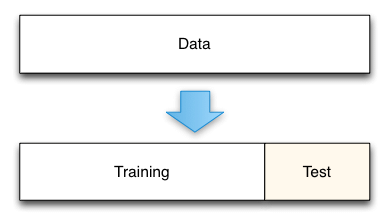

**Data splitting** is a common practice in machine learning and data analysis, where a dataset is divided into multiple subsets for various purposes, such as training a model, validating its performance, and testing its generalization to new, unseen data.

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Training, Development and Testing Phase
- Baseline
  - Textblob
- Feature Extraction
  - Unigram
    - Without Stopwords
    - With Stopwords
    - Without Custom Stopwords
  - Bigram
    - With Stopwords
  - Trigram
    - With Stopwords
- Classification Report
  - Unigram
  - Bigram
  - Trigram
- Save Dataframe to CSV File

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from time import time

from textblob import TextBlob

from sklearn.feature_extraction import text

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
# Reading the dataset with no columns titles and with latin encoding 
twitter_data = pd.read_csv('twitter_sentiment_data_cleaned.csv', encoding = "ISO-8859-1")

In [3]:
# As the data has no column titles, we will add our own
twitter_data.columns = ['sentiment', 'text']

In [4]:
# Show the first 5 rows of the dataframe.
twitter_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text
0,4,is lookin ward to a long weekend really dont want to go to work day tho x
1,4,myweakness is music and i live to meet the people who make it
2,4,figured out the internet on my new ipod
3,4,can not wait to worship with you guys tonight it ll be so much fun
4,4,congrats james i m sure the book is going to be a huge success


In [5]:
# Print bottom 5 rows in the dataframe.
twitter_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,sentiment,text
399995,0,that is he does not know i tweet and i would like keep it that way sorry bad wife
399996,0,huh what
399997,0,only thing is im broke
399998,0,wish i could work from home today nothing will be going on here
399999,0,i miss you too i was so worried well today s my last day of school b the break glad u feel better love you


In [6]:
# Print the shape of the DataFrame
print("The shape of data frame:", twitter_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(twitter_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(twitter_data.columns))

The shape of data frame: (400000, 2)
Number of Rows in the dataframe: 400000
Number of Columns in the dataframe: 2


In [7]:
twitter_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  400000 non-null  int64 
 1   text       399187 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [8]:
twitter_data['sentiment'] = twitter_data['sentiment'].map({0:0,4:1})

In [9]:
twitter_data.dropna(inplace=True)

In [10]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399187 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  399187 non-null  int64 
 1   text       399187 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.1+ MB


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">TRAINING, DEVELOPMENT AND TESTING PHASE</h2>
</div>

We will split the data into three sections: train, development and test. Our chosen ratio is 98/1/1 i.e. 98% for the training set, 1% for the development set and 1% for the testing set.
* Train set: The dataset used for learning
* Development Set: A validation/development dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.
* Test Set: The dataset used to assess the performance of a model.

In [11]:
# Define all other columns except the target variable
x = twitter_data['text'] 
# Define the target variable
y = twitter_data['sentiment']

In [12]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size = 0.02, random_state = 42)

In [13]:
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, 
                                                              test_size = 0.5, random_state = 42)

In [14]:
print("Training set has {0} entries, where {1:.2f} are positive and {2:.2f} are negative".
      format(len(x_train),len(x_train[y_train==1])/len(x_train)*100, len(x_train[y_train==0])/len(x_train)*100))

Training set has 391203 entries, where 49.98 are positive and 50.02 are negative


In [15]:
print("Validation set has {0} entries, where {1:.2f} are positive and {2:.2f} are negative".
      format(len(x_validation),len(x_validation[y_validation==1])/len(x_validation)*100, 
             len(x_validation[y_validation==0])/len(x_validation)*100))

Validation set has 3992 entries, where 51.13 are positive and 48.87 are negative


In [16]:
print("Testing set has {0} entries, where {1:.2f} are positive and {2:.2f} are negative".
      format(len(x_test),len(x_test[y_test==1])/len(x_test)*100, 
             len(x_test[y_test==0])/len(x_test)*100))

Testing set has 3992 entries, where 50.38 are positive and 49.62 are negative


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">BASELINE</h2>
</div>

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> TextBlob </span>
</br>

We will use the sentiment analysis function of TextBlob as baseline for our project. It will provide us a point of reference to compare our future models.

In [17]:
tbresult = []
for i in x_validation:
    tbresult.append(TextBlob(i).sentiment.polarity)

In [18]:
tbpred = []
for i in tbresult:
    if i<0:
        tbpred.append(0)
    else:
        tbpred.append(1)    

In [19]:
# Assuming y_validation and tbpred are your actual and predicted labels, respectively
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1, 0]))
confusion = pd.DataFrame(conmat, index=['positive', 'negative'], columns=['predicted_positive', 'predicted_negative'])

In [20]:
# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
          predicted_positive  predicted_negative
positive                1829                 212
negative                1297                 654


In [21]:
# Calculating and printing the accuracy score
accuracy = accuracy_score(y_validation, tbpred)
print("Accuracy score: {0:.2f} %".format(accuracy * 100))

Accuracy score: 62.20 %


In [22]:
print("Classification Report")
print(classification_report(y_validation, tbpred))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.34      0.46      1951
           1       0.59      0.90      0.71      2041

    accuracy                           0.62      3992
   macro avg       0.67      0.62      0.59      3992
weighted avg       0.67      0.62      0.59      3992



Hence, TextBlob sentiment analysis yielded 62.20% accuracy on the validation set.

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">FEATURE EXTRACTION</h2>
</div>

In [23]:
null_accuracy = 0
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test==0])/len(x_test)>0.5:
        null_accuracy = len(x_test[y_test==0])/len(x_test)
    else:
        null_accuracy = 1 - len(x_test[y_test==0])/len(x_test)
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("Null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("Accuracy: {0:.2f}%".format(accuracy*100))
    if accuracy>null_accuracy:
        print("Model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy==null_accuracy:
        print("Model has the same accuracy as null accuracy")
    else:
        print("Model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("Train and test time: {0:.2f}s".format(train_test_time))
    print("-"*50)
    return accuracy, train_test_time

In [24]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000, 100001, 10000)

In [25]:
def nfeature_accuracy_checker(vectorizer = cvec, n_features = n_features, stop_words = None, 
                              ngram_range = (1,1), classifier = lr):
    result = []
    print(classifier, "\n")
    for n in n_features:
        vectorizer.set_params(stop_words = stop_words, max_features = n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', classifier)])
        print("Validation result for {0} features".format(n))
        nfeature_accuracy, ttime = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n, nfeature_accuracy, ttime))
    return result

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> UNIGRAM </span>
</br>

<br>
<span style="color: blue; background-color: grey; font-weight: bold; padding: 5px; font-size: 24px;"> WITHOUT STOPWORDS </span>
</br>

In [26]:
%%time
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_unigram = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression() 

Validation result for 10000 features
Null accuracy: 51.13%
Accuracy: 76.00%
Model is 24.87% more accurate than null accuracy
Train and test time: 9.63s
--------------------------------------------------
Validation result for 20000 features
Null accuracy: 51.13%
Accuracy: 76.38%
Model is 25.25% more accurate than null accuracy
Train and test time: 9.43s
--------------------------------------------------
Validation result for 30000 features
Null accuracy: 51.13%
Accuracy: 76.33%
Model is 25.20% more accurate than null accuracy
Train and test time: 9.59s
--------------------------------------------------
Validation result for 40000 features
Null accuracy: 51.13%
Accuracy: 76.60%
Model is 25.48% more accurate than null accuracy
Train and test time: 10.13s
--------------------------------------------------
Validation result for 50000 features
Null accuracy: 51.13%
Accuracy: 76.25%
Model is 25.13% more accurate than null accuracy


<br>
<span style="color: blue; background-color: grey; font-weight: bold; padding: 5px; font-size: 24px;"> WITH STOPWORDS </span>
</br>

In [27]:
%%time
print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_unigram_stop = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression() 

Validation result for 10000 features
Null accuracy: 51.13%
Accuracy: 79.11%
Model is 27.98% more accurate than null accuracy
Train and test time: 10.08s
--------------------------------------------------
Validation result for 20000 features
Null accuracy: 51.13%
Accuracy: 79.13%
Model is 28.01% more accurate than null accuracy
Train and test time: 10.34s
--------------------------------------------------
Validation result for 30000 features
Null accuracy: 51.13%
Accuracy: 79.38%
Model is 28.26% more accurate than null accuracy
Train and test time: 11.14s
--------------------------------------------------
Validation result for 40000 features
Null accuracy: 51.13%
Accuracy: 79.08%
Model is 27.96% more accurate than null accuracy
Train and test time: 10.27s
--------------------------------------------------
Validation result for 50000 features
Null accuracy: 51.13%
Accuracy: 79.21%
Model is 28.08% more accurate than null accuracy


In [28]:
# Reading the dataset with no columns titles and with latin encoding 
term_freq_df = pd.read_csv('twitter_term_frequency_data.csv', encoding = "ISO-8859-1")

In [29]:
# Print bottom 5 rows in the dataframe.
term_freq_df.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,word,negative,positive,total
0,aa,45,23,68
1,aaa,23,12,35
2,aaaa,10,6,16
3,aaaaa,5,3,8
4,aaaaaa,4,5,9


In [30]:
term_freq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118312 entries, 0 to 118311
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   word      118310 non-null  object
 1   negative  118312 non-null  int64 
 2   positive  118312 non-null  int64 
 3   total     118312 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.6+ MB


In [31]:
term_freq_df.sort_values(by='total', ascending=False).head(10)

,word,negative,positive,total
104018,to,78026,63169,141195
102384,the,64676,66278,130954
68562,my,48048,31387,79435
51311,it,39520,36896,76416
3764,and,38529,37495,76024
117285,you,26060,49705,75765
71680,not,49426,21870,71296
51106,is,33384,27617,61001
49471,in,28829,25231,54060
36839,for,24852,29027,53879


In [32]:
a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

False

In [33]:
my_stop_words = a

<br>
<span style="color: blue; background-color: grey; font-weight: bold; padding: 5px; font-size: 24px;"> WITHOUT CUSTOM STOPWORDS </span>
</br>

In [34]:
%%time
print("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS\n")
feature_result_wocw = nfeature_accuracy_checker(stop_words = my_stop_words)

RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS

LogisticRegression() 

Validation result for 10000 features
Null accuracy: 51.13%
Accuracy: 79.11%
Model is 27.98% more accurate than null accuracy
Train and test time: 10.47s
--------------------------------------------------
Validation result for 20000 features
Null accuracy: 51.13%
Accuracy: 79.13%
Model is 28.01% more accurate than null accuracy
Train and test time: 11.40s
--------------------------------------------------
Validation result for 30000 features
Null accuracy: 51.13%
Accuracy: 79.38%
Model is 28.26% more accurate than null accuracy
Train and test time: 11.16s
--------------------------------------------------
Validation result for 40000 features
Null accuracy: 51.13%
Accuracy: 79.08%
Model is 27.96% more accurate than null accuracy
Train and test time: 10.97s
--------------------------------------------------
Validation result for 50000 features
Null accuracy: 51.13%
Accuracy: 79.21%
Model is 28.08% more accurate than null

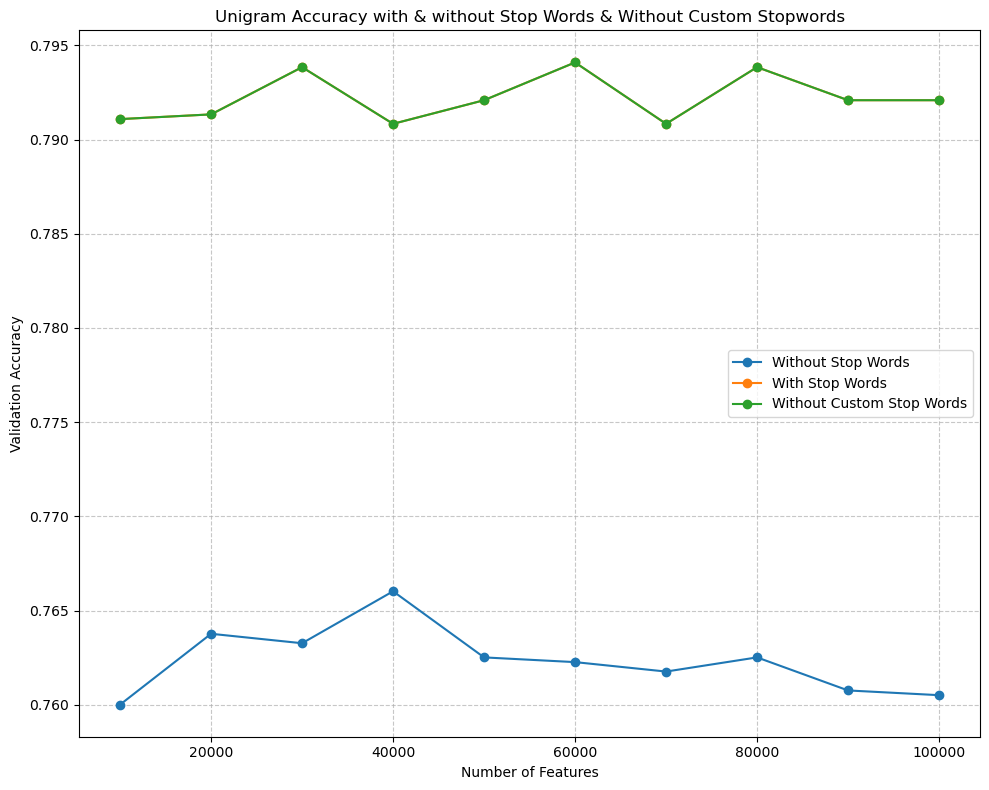

In [35]:
plt.figure(figsize=(10, 8))

feature_plot_ug = pd.DataFrame(feature_result_unigram, columns = ['nfeatures', 'validation_accuracy', 'train_test_time'])
feature_plot_wstop = pd.DataFrame(feature_result_unigram_stop, columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
feature_plot_stopcw = pd.DataFrame(feature_result_wocw, columns = ['nfeatures', 'validation_accuracy', 'train_test_time'])

# Plotting without stop words
plt.plot(feature_plot_ug.nfeatures, feature_plot_ug.validation_accuracy, label='Without Stop Words', marker='o', linestyle='-')

# Plotting with stop words
plt.plot(feature_plot_wstop.nfeatures, feature_plot_wstop.validation_accuracy, label='With Stop Words', marker='o', linestyle='-')

# Plotting without custom stop words
plt.plot(feature_plot_stopcw.nfeatures, feature_plot_stopcw.validation_accuracy, label='Without Custom Stop Words', marker='o', linestyle='-')

# Adding labels and title
plt.title('Unigram Accuracy with & without Stop Words & Without Custom Stopwords')
plt.xlabel('Number of Features')
plt.ylabel('Validation Accuracy')

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding legend
plt.legend()

# Adding a tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

Hence, removing stop words did not improve the performance of the model. In this setting, keeping the stopwords improve the model performance.

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> BIGRAM </span>
</br>

<br>
<span style="color: blue; background-color: grey; font-weight: bold; padding: 5px; font-size: 24px;"> WITH STOPWORDS </span>
</br>

In [36]:
%%time
print("RESULT FOR BIGRAM\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1,2))

RESULT FOR BIGRAM

LogisticRegression() 

Validation result for 10000 features
Null accuracy: 51.13%
Accuracy: 79.86%
Model is 28.73% more accurate than null accuracy
Train and test time: 21.16s
--------------------------------------------------
Validation result for 20000 features
Null accuracy: 51.13%
Accuracy: 79.93%
Model is 28.81% more accurate than null accuracy
Train and test time: 24.28s
--------------------------------------------------
Validation result for 30000 features
Null accuracy: 51.13%
Accuracy: 80.29%
Model is 29.16% more accurate than null accuracy
Train and test time: 28.54s
--------------------------------------------------
Validation result for 40000 features
Null accuracy: 51.13%
Accuracy: 80.41%
Model is 29.28% more accurate than null accuracy
Train and test time: 23.25s
--------------------------------------------------
Validation result for 50000 features
Null accuracy: 51.13%
Accuracy: 80.79%
Model is 29.66% more accurate than null accuracy
Train and test ti

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 32px;"> TRIGRAM </span>
</br>

<br>
<span style="color: blue; background-color: grey; font-weight: bold; padding: 5px; font-size: 24px;"> WITH STOPWORDS </span>
</br>

In [37]:
%%time
print("RESULT FOR TRIGRAM\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1,3))

RESULT FOR TRIGRAM

LogisticRegression() 

Validation result for 10000 features
Null accuracy: 51.13%
Accuracy: 79.86%
Model is 28.73% more accurate than null accuracy
Train and test time: 41.10s
--------------------------------------------------
Validation result for 20000 features
Null accuracy: 51.13%
Accuracy: 80.14%
Model is 29.01% more accurate than null accuracy
Train and test time: 36.72s
--------------------------------------------------
Validation result for 30000 features
Null accuracy: 51.13%
Accuracy: 80.34%
Model is 29.21% more accurate than null accuracy
Train and test time: 39.53s
--------------------------------------------------
Validation result for 40000 features
Null accuracy: 51.13%
Accuracy: 80.29%
Model is 29.16% more accurate than null accuracy
Train and test time: 38.33s
--------------------------------------------------
Validation result for 50000 features
Null accuracy: 51.13%
Accuracy: 80.66%
Model is 29.53% more accurate than null accuracy
Train and test t

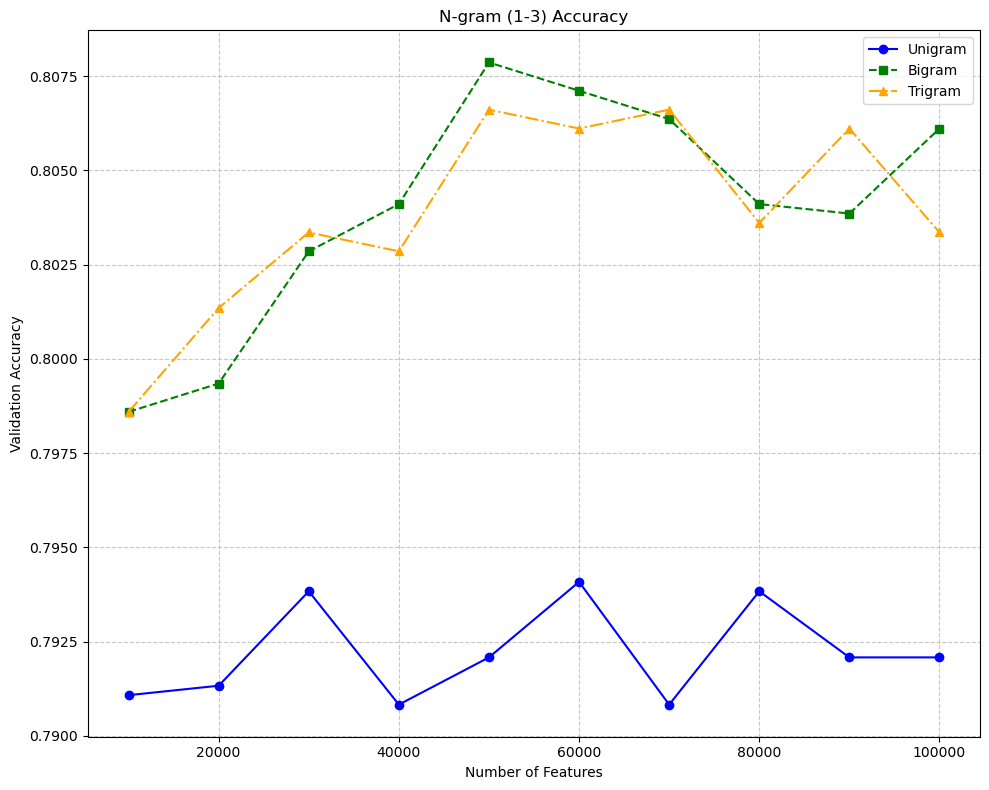

In [38]:
plt.figure(figsize=(10, 8))

feature_plot_ug = pd.DataFrame(feature_result_unigram_stop, columns = ['nfeatures', 'validation_accuracy', 'train_test_time'])
feature_plot_bg = pd.DataFrame(feature_result_bg, columns=['nfeatures', 'validation_accuracy', 'train_test_time'])
feature_plot_tg = pd.DataFrame(feature_result_tg, columns = ['nfeatures', 'validation_accuracy', 'train_test_time'])

# Plotting unigram
plt.plot(feature_plot_ug.nfeatures, feature_plot_ug.validation_accuracy, label='Unigram', marker='o', linestyle='-', color='blue')

# Plotting bigram
plt.plot(feature_plot_bg.nfeatures, feature_plot_bg.validation_accuracy, label='Bigram', marker='s', linestyle='--', color='green')

# Plotting trigram
plt.plot(feature_plot_tg.nfeatures, feature_plot_tg.validation_accuracy, label='Trigram', marker='^', linestyle='-.', color='orange')

# Adding labels and title
plt.title('N-gram (1-3) Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Validation Accuracy')

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding legend
plt.legend()

# Adding a tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">CLASSIFICATION REPORT</h2>
</div>

In [39]:
null_accuracy = 0
def evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test==0])/len(x_test)>0.5:
        null_accuracy = len(x_test[y_test==0])/len(x_test)
    else:
        null_accuracy = 1 - len(x_test[y_test==0])/len(x_test)
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'], columns=['predicted_negative', 'predicted_positive'])
    print("Null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("Accuracy: {0:.2f}%".format(accuracy*100))
    if accuracy>null_accuracy:
        print("Model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy==null_accuracy:
        print("Model has the same accuracy as null accuracy")
    else:
        print("Model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("-"*50)
    print("CONFUSION MATRIX\n")
    print(confusion)
    print("-"*50)
    print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

<br>
<span style="color: lightgreen; background-color: black; font-weight: bold; padding: 5px; font-size: 24px;"> UNIGRAM </span>
</br>

In [40]:
%%time
ug_vector = CountVectorizer(max_features=100000)
ug_pipeline = Pipeline([('vectorizer', ug_vector), ('classifier', lr)])
evaluate(ug_pipeline, x_train, y_train, x_validation, y_validation)

Null accuracy: 51.13%
Accuracy: 79.21%
Model is 28.08% more accurate than null accuracy
--------------------------------------------------
CONFUSION MATRIX

          predicted_negative  predicted_positive
negative                 654                1297
positive                 212                1829
--------------------------------------------------
              precision    recall  f1-score   support

    negative       0.80      0.77      0.78      1951
    positive       0.79      0.81      0.80      2041

    accuracy                           0.79      3992
   macro avg       0.79      0.79      0.79      3992
weighted avg       0.79      0.79      0.79      3992

Wall time: 12.9 s


<br>
<span style="color: lightgreen; background-color: black; font-weight: bold; padding: 5px; font-size: 24px;"> BIGRAM </span>
</br>

In [41]:
%%time
bg_vector = CountVectorizer(max_features=70000, ngram_range=(1,2))
bg_pipeline = Pipeline([('vectorizer', bg_vector), ('classifier', lr)])
evaluate(bg_pipeline, x_train, y_train, x_validation, y_validation)

Null accuracy: 51.13%
Accuracy: 80.64%
Model is 29.51% more accurate than null accuracy
--------------------------------------------------
CONFUSION MATRIX

          predicted_negative  predicted_positive
negative                 654                1297
positive                 212                1829
--------------------------------------------------
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      1951
    positive       0.81      0.81      0.81      2041

    accuracy                           0.81      3992
   macro avg       0.81      0.81      0.81      3992
weighted avg       0.81      0.81      0.81      3992

Wall time: 23.3 s


<br>
<span style="color: lightgreen; background-color: black; font-weight: bold; padding: 5px; font-size: 24px;"> TRIGRAM </span>
</br>

In [42]:
%%time
tg_vector = CountVectorizer(max_features=80000, ngram_range=(1,3))
tg_pipeline = Pipeline([('vectorizer', tg_vector), ('classifier', lr)])
evaluate(tg_pipeline, x_train, y_train, x_validation, y_validation)

Null accuracy: 51.13%
Accuracy: 80.36%
Model is 29.23% more accurate than null accuracy
--------------------------------------------------
CONFUSION MATRIX

          predicted_negative  predicted_positive
negative                 654                1297
positive                 212                1829
--------------------------------------------------
              precision    recall  f1-score   support

    negative       0.80      0.79      0.80      1951
    positive       0.80      0.82      0.81      2041

    accuracy                           0.80      3992
   macro avg       0.80      0.80      0.80      3992
weighted avg       0.80      0.80      0.80      3992

Wall time: 40.3 s


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">SAVING THE DATASET</h2>
</div>

In [43]:
feature_plot_ug.to_csv('ug-without-stopwords.csv')
feature_plot_wstop.to_csv('ug-with-stopwords.csv')
feature_plot_stopcw.to_csv('ug-without-custom-stopwords.csv')

In [44]:
feature_plot_ug.to_csv('ug.csv')
feature_plot_bg.to_csv('bg.csv')
feature_plot_tg.to_csv('tg.csv')